In [23]:
#import torch
#import torch.nn as nn

#import pandas as pd
#import numpy as np
import yfinance as yf

#print(pd.__version__)
#print(np.__version__)
#print(yf.__version__)
  
#data = yf.Ticker("SPX")
datasnp = yf.download( 
        tickers = "^GSPC",
        period = "max",
        interval = "1d",
        ignore_tz = False,
        group_by = 'ticker',
        auto_adjust = True,
        repair = False,
        prepost = True,
        threads = True,
        proxy = None,
        start="2001-01-01",
        end="2023-01-01"    
    )

print(datasnp.info)
#data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30", group_by="ticker")

[*********************100%***********************]  1 of 1 completed
<bound method DataFrame.info of                Open     High      Low    Close  Adj Close  Volume
Date                                                             
2012-01-03  0.07222  0.07222  0.07222  0.07222    0.07222       0
2012-01-04  0.07222  0.07222  0.07222  0.07222    0.07222       0
2012-01-05  0.07222  0.07222  0.07222  0.07222    0.07222       0
2012-01-06  0.07222  0.07222  0.07222  0.07222    0.07222       0
2012-01-09  0.06964  0.06964  0.06706  0.06706    0.06706  156296
...             ...      ...      ...      ...        ...     ...
2018-01-24  0.05500  0.05500  0.05500  0.05500    0.05500    7000
2018-01-25  0.05500  0.05500  0.05500  0.05500    0.05500    1160
2018-01-26  0.05000  0.05000  0.05000  0.05000    0.05000    1800
2018-01-29  0.06000  0.06000  0.05000  0.05000    0.05000   60817
2018-01-30  0.05000  0.05000  0.04500  0.05000    0.05000  150100

[1529 rows x 6 columns]>


In [2]:
import yfinance as yf

data = yf.download( 
        tickers = "^GSPC,^VIX,^FVX,GC=F",
        period = "max",
        interval = "1d",
        ignore_tz = False,
        group_by = 'ticker',
        auto_adjust = True,
        repair = False,
        prepost = True,
        threads = True,
        proxy = None,
        start="2001-01-01",
        end="2023-01-01"    
    )

print(data.info)
print(data.describe())

[*********************100%***********************]  4 of 4 completed
<bound method DataFrame.info of                                 ^VIX                                          \
                                Open       High        Low      Close Volume   
Date                                                                           
2001-01-02 00:00:00-05:00  27.930000  30.400000  27.920000  29.990000    0.0   
2001-01-03 00:00:00-05:00  29.629999  29.959999  25.990000  26.600000    0.0   
2001-01-04 00:00:00-05:00  26.350000  27.190001  26.129999  26.969999    0.0   
2001-01-05 00:00:00-05:00  27.809999  29.040001  27.209999  28.670000    0.0   
2001-01-08 00:00:00-05:00  29.980000  30.799999  29.719999  29.840000    0.0   
...                              ...        ...        ...        ...    ...   
2022-12-23 00:00:00-05:00  22.170000  22.639999  20.780001  20.870001    0.0   
2022-12-27 00:00:00-05:00  21.670000  22.799999  21.590000  21.650000    0.0   
2022-12-28 00:00:00

                                 ^GSPC
                                 Close
Date                                  
2001-01-02 00:00:00-05:00  1283.270020
2001-01-03 00:00:00-05:00  1347.560059
2001-01-04 00:00:00-05:00  1333.339966
2001-01-05 00:00:00-05:00  1298.349976
2001-01-08 00:00:00-05:00  1295.859985
...                                ...
2022-12-23 00:00:00-05:00  3844.820068
2022-12-27 00:00:00-05:00  3829.250000
2022-12-28 00:00:00-05:00  3783.219971
2022-12-29 00:00:00-05:00  3849.280029
2022-12-30 00:00:00-05:00  3839.500000

[5539 rows x 1 columns]


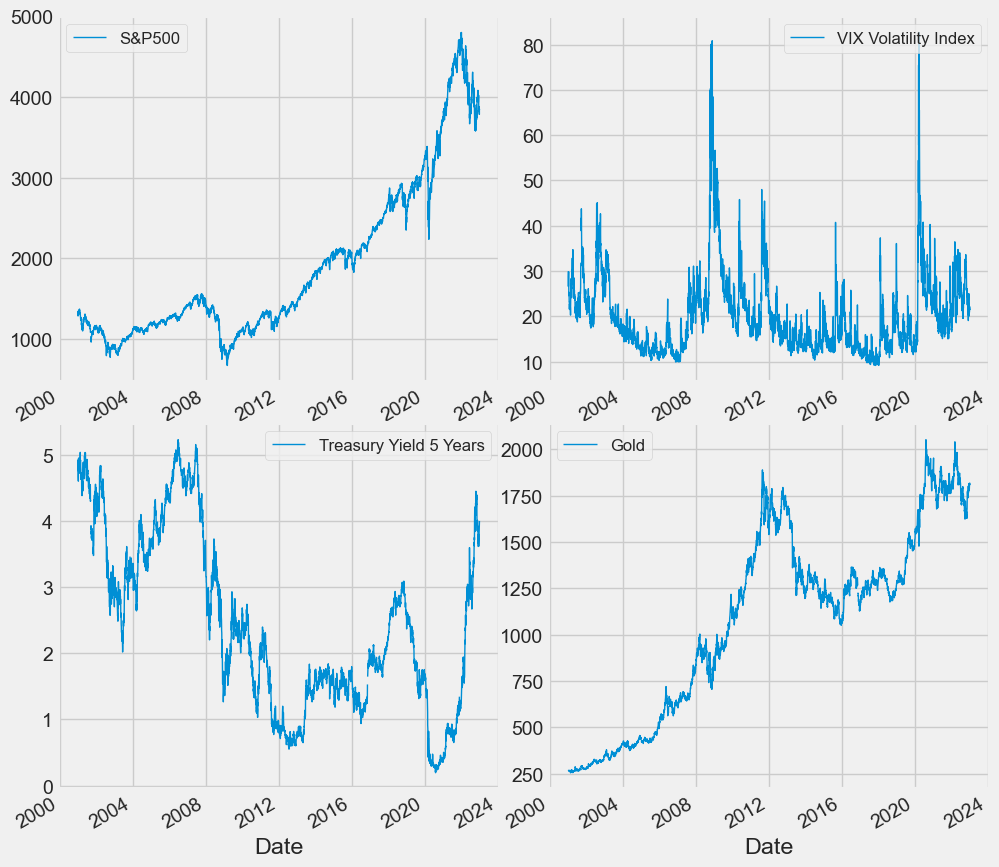

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (10, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
fig.tight_layout(pad=1.0)
plt.rcParams.update({'font.size': 12})
print(data[[('^GSPC','Close')]])
data.plot( y = [('^GSPC','Close')], kind='line',linewidth=1.0,ax=axes[0,0])
axes[0,0].legend(['S&P500'])
data.plot(y = [('^VIX','Close')], kind='line',linewidth=1.0,ax=axes[0,1])
axes[0,1].legend(['VIX Volatility Index'])
data.plot(y = [('^FVX','Close')], kind='line',linewidth=1.0,ax=axes[1,0])
axes[1,0].legend(['Treasury Yield 5 Years'])
data.plot(y = [('GC=F','Close')], kind='line',linewidth=1.0,ax=axes[1,1])
axes[1,1].legend(['Gold'])


In [78]:
data.to_csv('snp500_data.csv', index = False)
data.to_csv('snp500_dates.csv', index = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


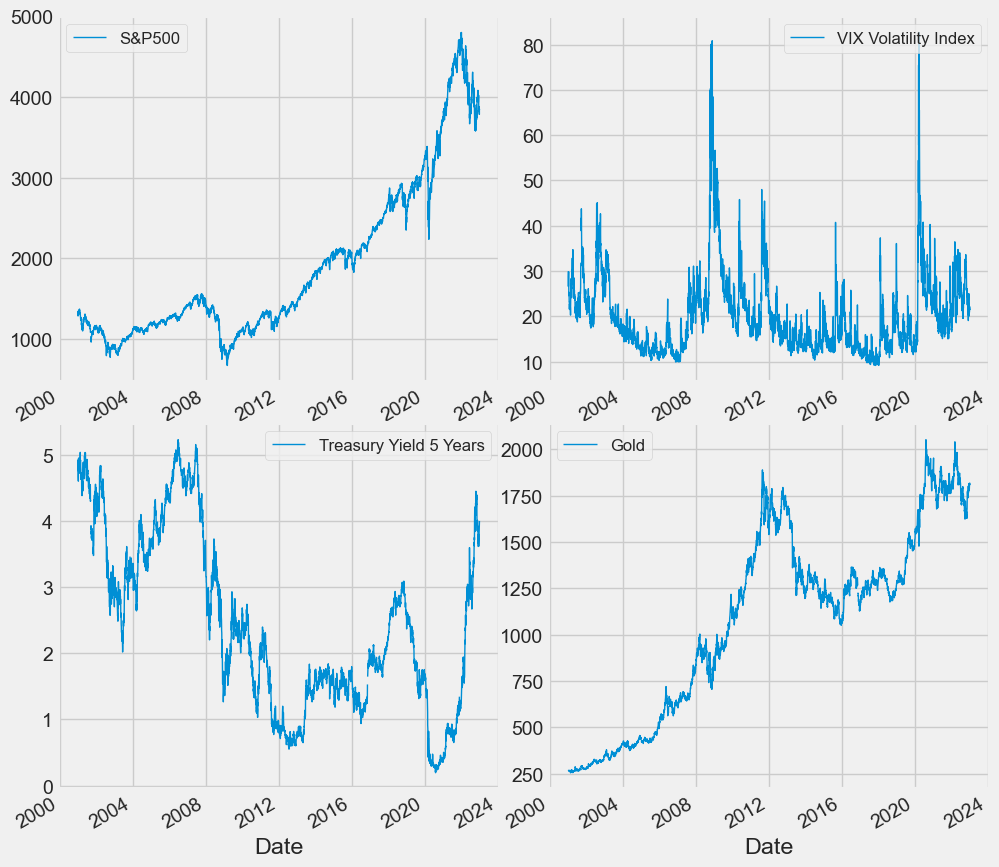

In [29]:
from importlib import reload 
import dataclass
reload(dataclass)

data = dataclass.StockData()
data.display_data()
data.save_data()
